In [1]:
import matplotlib.pyplot as plt
import numpy as np
from brian2.only import *
import seaborn as sns
import deepdish as dd
from scipy.stats import bootstrap

import plot_utils as pu
from digest import conds, get_digest_output, get_voltages
import isi_indexing as ii
from readout import load_results
from digest import get_voltage_histograms

import conf.isi5_mouse as cfg
from demonstrator import demonstrator

In [2]:
measures = 'Threshold', 'Depression', 'Synapses'

In [3]:
isi, STD, TA, templ = 500, 1, 1, 0
net, ipair, istim = [demonstrator[k] for k in ('net', 'ipair', 'istim')]
pair, stim = cfg.pairings[ipair], cfg.pairings[ipair][istim]
fname_format = dict(net=net, isi=isi, STD=STD, TA=TA, templ=templ)
res = load_results(cfg.fname.format(**fname_format), {'u': 'v'}, raw_fbase=cfg.raw_fbase.format(**fname_format))
res['voltage_histograms'] = get_voltage_histograms(cfg.params, res)

In [4]:
histograms = {cond: {
    'pspike': res['spikes'][ipair][stim][cond]['spike_hist'],
    **{measure: res['voltage_histograms'][measure][ipair][stim][cond] for measure in measures}
} for cond in conds}

In [5]:
index_N, index_t = ii.get_onset_ordering(cfg, np.stack([h['pspike'] for h in histograms.values()]))
tmax = np.max(index_t)+1
time = np.arange(tmax) * cfg.params['dt']

In [7]:
def plot_hists(hists, index_N, index_t, title=None, width=5, height=10, labelling=pu.labels, **kwargs):
    labels = None
    for measure, hist in hists.items():
        if labels is None:
            labels, descriptor = ii.getlabels(cfg, cfg.N_templates, True, **kwargs)
        hist = hists[measure]
        if measure in measures:
            hist = hist/mV
        fig, axs, cb = pu.plot_pulse_hist(
            hist, index_N, index_t, cfg.params['dt'],
            figsize=(width*len(hist), height), symmetric=False, cmap='turbo')
        for ax in axs:
            ax.set_title(labelling[measure])
        fig.suptitle('\n'.join(filter(None, [measure, descriptor])) if title is None else title)
        cb.set_label(labelling[measure])
    plt.show()
    plt.close('all')

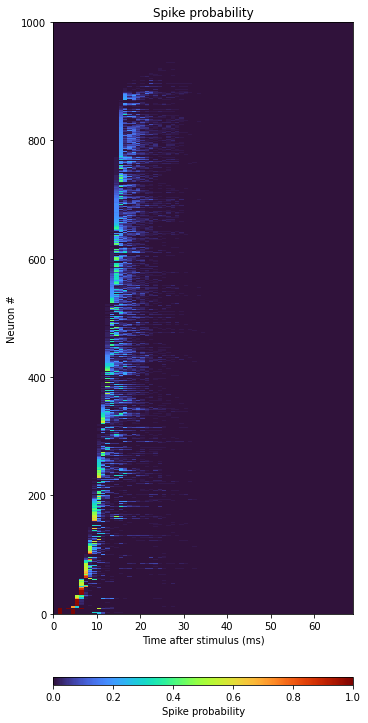

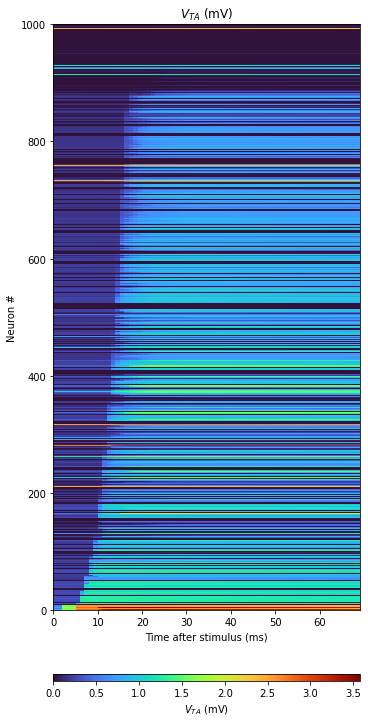

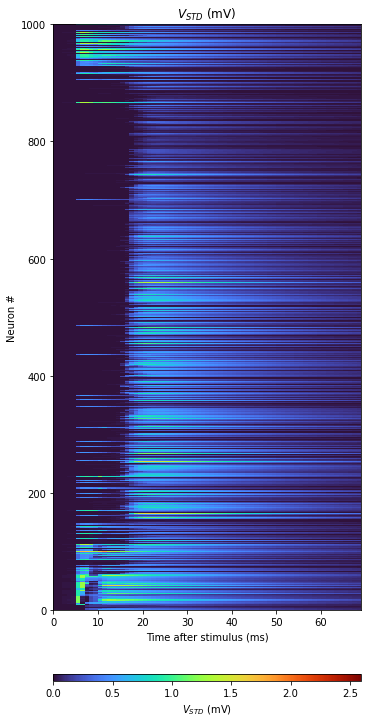

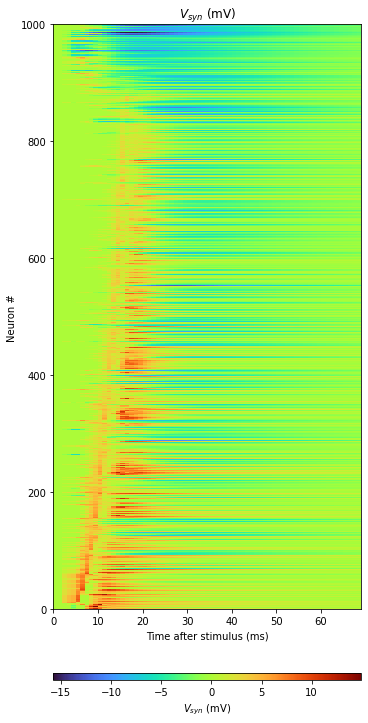

In [8]:
plot_hists({k:histograms['dev'][k][None,:,:] for k in ('pspike',) + measures}, index_N, index_t, title='', ipair=ipair, istim=istim)